In [22]:
from matplotlib import pyplot as plt
from matplotlib import colors

We use a "discrete angle resolution", such that horizontal/vertical look-ahead is always 10 units. This means from current (x, y), we can reach between (x+10,y+10) is 45° (Pi/2) and (x+10,y+10) is 0° (0). In between we have y+1, y+2, ..., y+9.

In [96]:
class map2d:
    def __init__(self, width, height, borders):
        self.width = width
        self.height = height
        self.borders = borders
        self.mat = self.give_matrix()
        self.colormap = colors.ListedColormap(["black", "lightgrey", "green"])
        
    def give_matrix(self):
        mat = [[0 for _ in range(self.width)] for _ in range(self.height)]
        for border in self.borders:
            for field in border:
                mat[field[0]][field[1]] = -1
        return mat
    
    def show(self):
        fig_size = (20, 20)
        f = plt.figure(figsize=fig_size)
        axarr = f.add_subplot(1, 1, 1)
        plt.title("2D map")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.imshow(X = self.mat, cmap = self.colormap, origin = "lower")
    
    def record_visit(self, y, x):
        self.mat[y][x] += 1

In [97]:
x = map2d(width=10, height=10, borders=[[(0,0)],[(1,1)]])

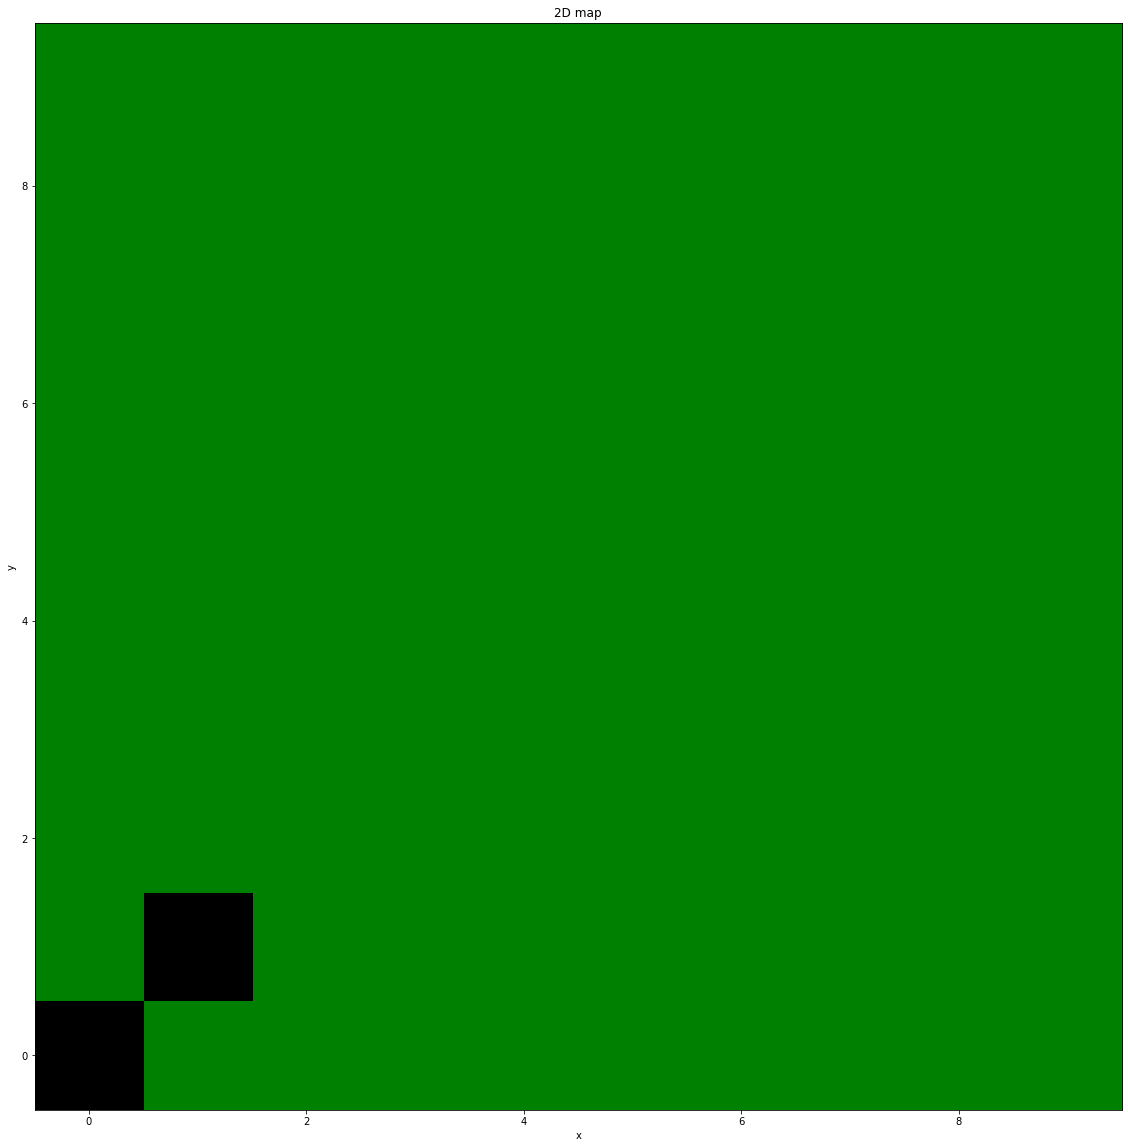

In [98]:
x.show()

In [99]:
class agent:
    def __init__(self, x, y, r, group, map2d):
        self.battery = 100
        self.x = x
        self.y = y
        self.r = r
        self.group = group
        self.map2d = map2d
        self.record_visit()
        
    def move(self):
        self.x += 1
        self.record_visit()
        
    def record_visit(self):
        self.map2d.record_visit(self.y, self.x)
        

In [100]:
a = agent(5, 5, 1, 0, x)

In [103]:
a.move()

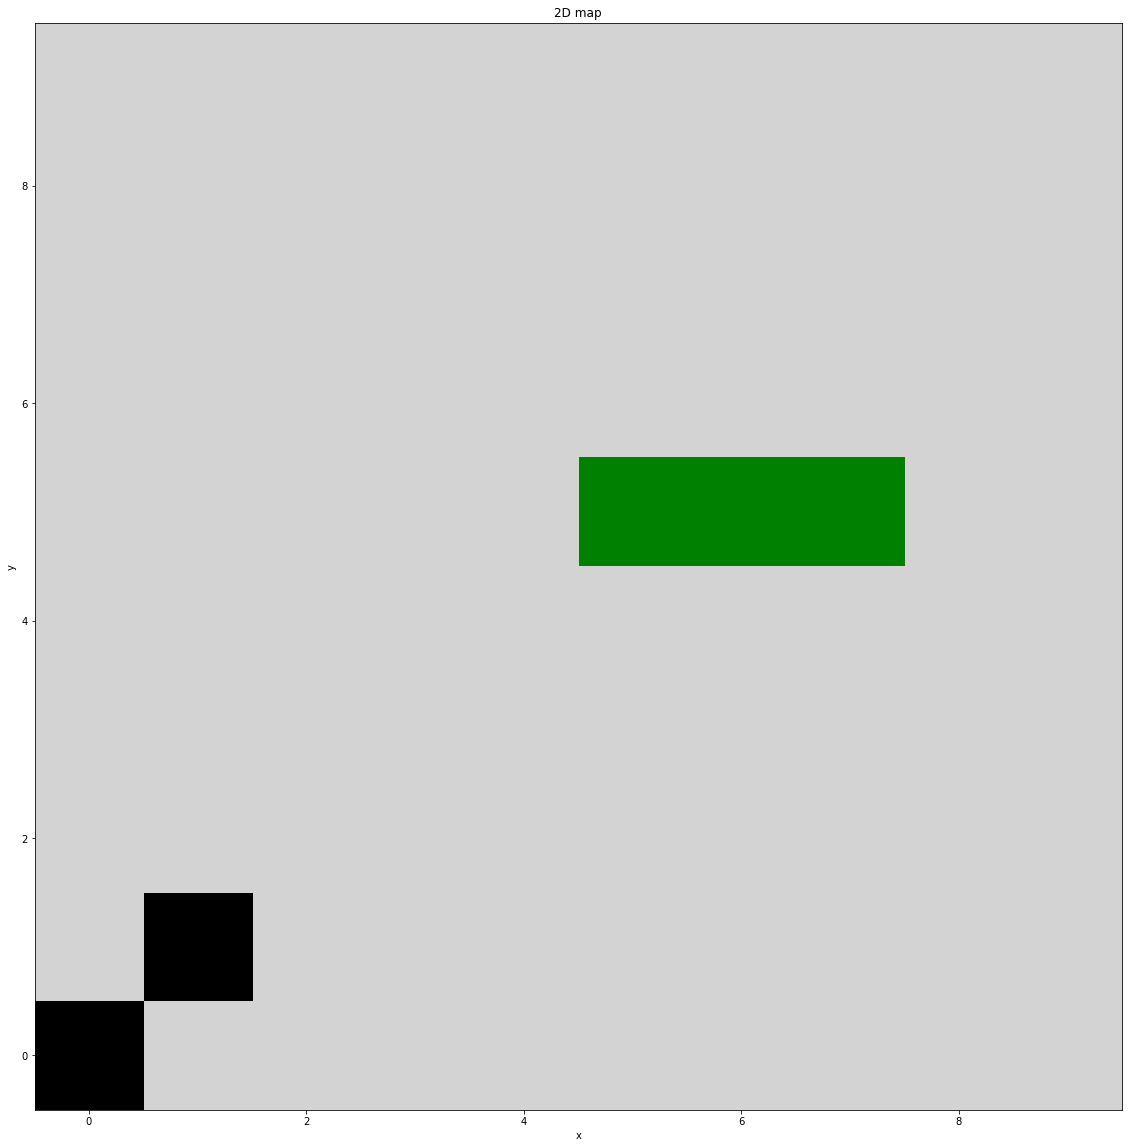

In [104]:
x.show()